# Dealing with Imbalanced Data in MultiClass

[DecisionForest](https://www.youtube.com/watch?v=L7Xj9dRfSKk&ab_channel=DecisionForest)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import time

In [44]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=2000,
    n_features=3,
    n_redundant=0,
    n_informative=3,
    n_repeated=0,
    n_classes=4,
    weights=[0.05, 0.05, 0.075, 0.9],
    flip_y = 0,
    random_state=21
)

In [45]:
X.shape

(2000, 3)

In [46]:
X

array([[ 1.23487865,  0.09778296, -1.19450226],
       [-0.50754138, -2.37255525, -0.06495787],
       [ 0.04248661,  1.82003723,  0.85992693],
       ...,
       [-0.93977995,  0.28109587,  2.18574785],
       [ 0.23694393,  0.70506616,  0.93704192],
       [-0.02570933,  0.66138671, -0.45511576]])

In [47]:
np.unique(y)

array([0, 1, 2, 3])

In [48]:
from collections import Counter

counter = Counter(y)
for k, v in counter.items():
    dist = v / len(y) * 100
    print(f"Class={k}, n={v} ({dist}%)")

Class=1, n=100 (5.0%)
Class=2, n=150 (7.5%)
Class=3, n=1650 (82.5%)
Class=0, n=100 (5.0%)


<BarContainer object of 4 artists>

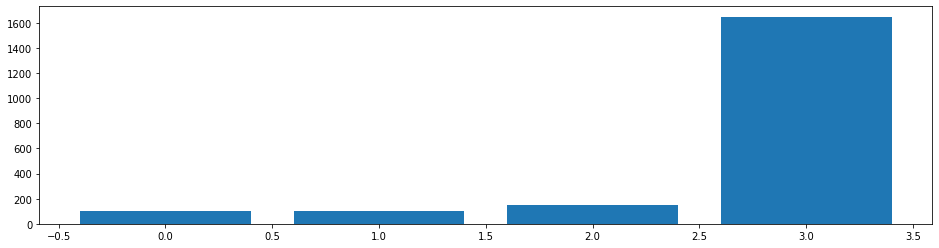

In [49]:
plt.figure(1, figsize=(16,4))
plt.bar(counter.keys(), counter.values())

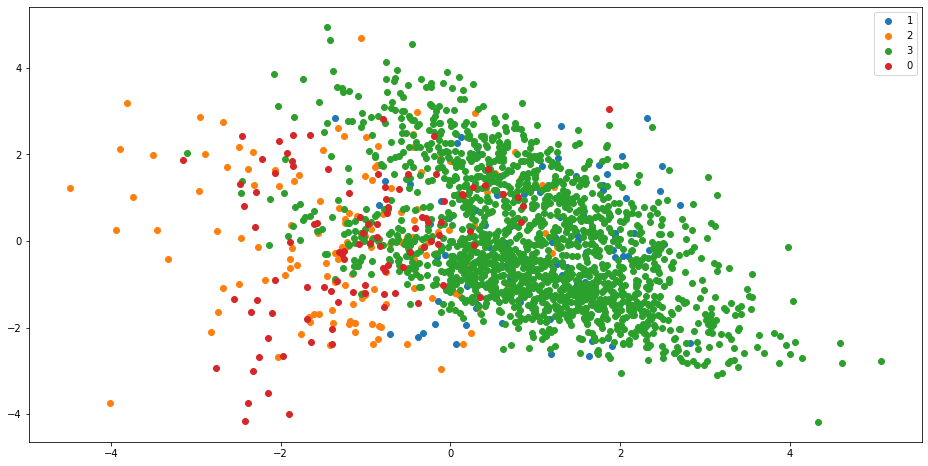

In [50]:
# Scatter
plt.figure(1, figsize=(16,8))
for label, _ in counter.items():
    row = np.where(y == label)[0]
    plt.scatter(X[row, 0], X[row, 1], label=str(label))
plt.legend()

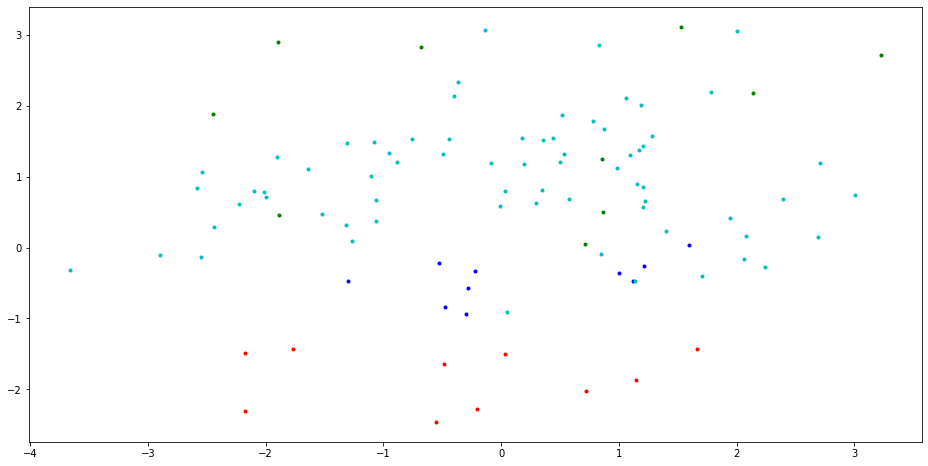

In [43]:
separable = False
while not separable:
    samples = make_classification(
        n_samples=100,
        n_features=3,
        n_redundant=0,
        n_informative=3,
        n_repeated=0,
        n_classes=4,
        weights=[0.1, 0.1, 0.1, 0.7],
        flip_y=0
    )
    
    one = samples[0][samples[1] == 0]
    two = samples[0][samples[1] == 1]
    three = samples[0][samples[1] == 2]
    four = samples[0][samples[1] == 3]
    separable = any(
        [
            (
                one[:, k].max() < two[:, k].min()
                and one[:, k].max() < three[:, k].min()
                and one[:, k].max() < four[:, k].min()
            )
            or (
                two[:, k].max() < one[:, k].min()
                and two[:, k].max() < three[:, k].min()
                and two[:, k].max() < four[:, k].min()
            )
            or (
                three[:, k].max() < one[:, k].min()
                and three[:, k].max() < two[:, k].min()
                and three[:, k].max() < four[:, k].min()
            )
            or (
                four[:, k].max() < one[:, k].min()
                and four[:, k].max() < two[:, k].min()
                and four[:, k].max() < three[:, k].min()
            )
            for k in range(2)
        ]
    )

plt.figure(1, figsize=(16, 8))
plt.plot(one[:, 0], one[:, 1], "r.")
plt.plot(two[:, 0], two[:, 1], "b.")
plt.plot(three[:, 0], three[:, 1], "g.")
plt.plot(four[:, 0], four[:, 1], "c.")

In [26]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=[900, 50, 100, 100], centers=None, n_features=3, random_state=7
)

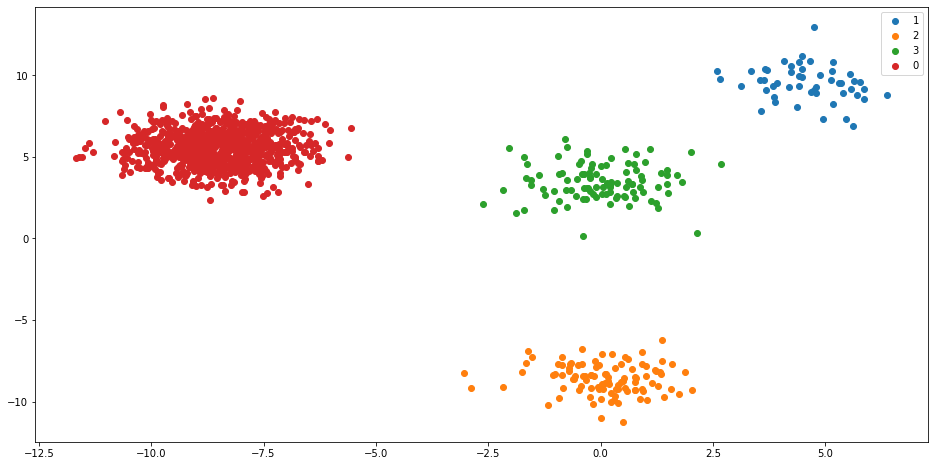

In [27]:
# Scatter plot of examples by clas label
plt.figure(figsize=(16,8))
for label, _ in counter.items():
    row = np.where(y == label)[0]
    plt.scatter(X[row, 0], X[row, 1], label=str(label))
plt.legend()

In [28]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [30]:
# Create model
model = DecisionTreeClassifier()
scores = cross_validate(model, X, y, cv=6, n_jobs=1, scoring="f1_macro")

In [31]:
scores

{'fit_time': array([0.00799346, 0.00101447, 0.0020144 , 0.00099373, 0.00100136,
        0.00101852]),
 'score_time': array([0.00299883, 0.00198913, 0.00098491, 0.0010016 , 0.00200057,
        0.00098801]),
 'test_score': array([1.        , 1.        , 1.        , 0.97771836, 1.        ,
        1.        ])}

In [ ]:
# !pip install imbalanced-learn

In [32]:
from imblearn.over_sampling import SMOTE

In [51]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [52]:
counter = Counter(y)
for k, v in counter.items():
    dist = v / len(y) * 100
    print(f"Class={k}, n={v} ({dist}%")

Class=1, n=1650 (25.0%
Class=2, n=1650 (25.0%
Class=3, n=1650 (25.0%
Class=0, n=1650 (25.0%


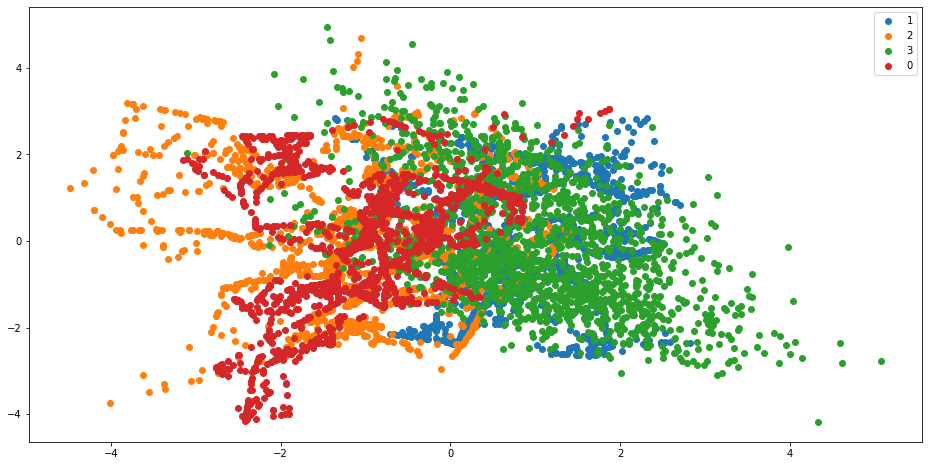

In [53]:
plt.figure(1, figsize=(16,8))
for label, _ in counter.items():
    row = np.where(y==label)[0]
    plt.scatter(X[row, 0], X[row, 1], label=str(label))
plt.legend()

In [54]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [55]:
oversample = SMOTE()
undersample = RandomUnderSampler()
steps = [("o", oversample), ("u", undersample)]
pipeline = Pipeline(steps=steps)

# Transform the dataset
X, y = pipeline.fit_resample(X, y)

In [56]:
counter = Counter(y)
for k, v in counter.items():
    dist = v / len(y) * 100
    print(f"Class={k}, n={v} ({dist}%)")

Class=0, n=1650 (25.0%)
Class=1, n=1650 (25.0%)
Class=2, n=1650 (25.0%)
Class=3, n=1650 (25.0%)


In [57]:
model = DecisionTreeClassifier()
scores = cross_validate(model, X, y, cv=6, n_jobs=-1, scoring="f1_macro")

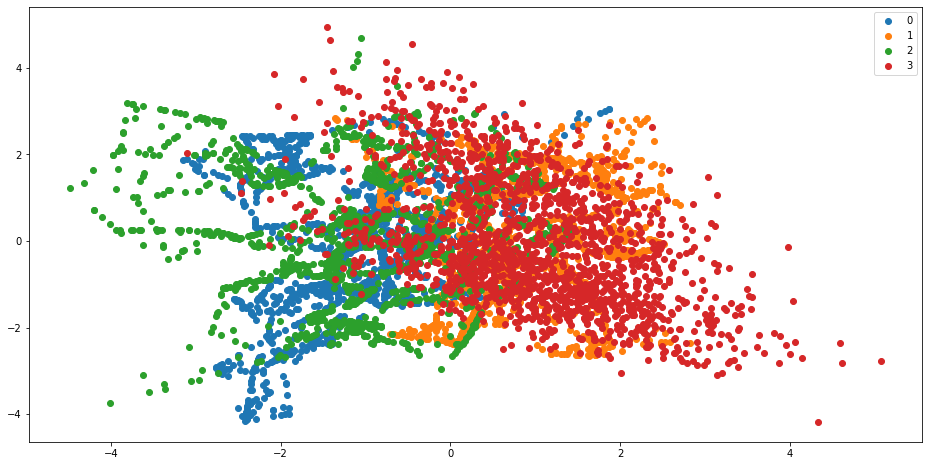

In [58]:
plt.figure(1, figsize=(16,8))
for label, _ in counter.items():
    row = np.where(y==label)[0]
    plt.scatter(X[row, 0], X[row, 1], label=str(label))
plt.legend()